# Acidity Function Data
The acidity function plots that were handed out in class were made using a graph from a review of acidity functions (referenced below). The figure below was scanned from the paper and digitized. The data was plotted to provide the handouts that you now have. This workbook and its associated data files will provide the data set.

<img src="images/Can.J.Chem.1983.2225-Acidity-Functions-Yates.jpg" width=300 class=center />

"Acidity functions: an update", Robin A. Cox and Keith Yates, *Can. J. Chem.*, **1983**, *61*, 2225-2243 [https://doi.org/10.1139/v83-388](https://doi.org/10.1139/v83-388)



## Data Sets
The extracted data is available in a series of csv files accompanying this notebook. the following files should be present in the ```data``` folder.

```
Formic_Acid.csv
Hydrochloric_Acid.csv
Hydrofluoric_Acid.csv
Nitric_Acid.csv
Perchloric_Acid.csv
Sulfuric_Acid.csv
Trifluoroacetic_Acid.csv
```

## Using Data Sets

The code below will load in a data set, plot the data and provide a function for interpolating the H0 value at any value of mole fraction acid.

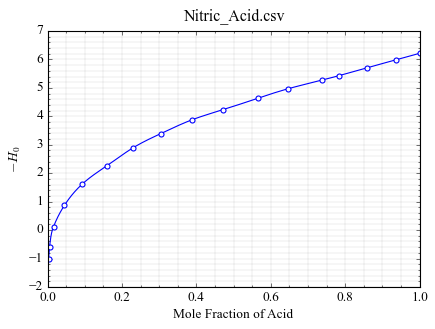

In [1]:
file_path = "data/"
file_name = "Nitric_Acid.csv"  # Change this filename to access the other data sets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline  # A function for interpolating a plot using the cubic spline method
from scipy.interpolate import interp1d     # A function for interpolating a plot using the connect-the-dots method


#print(file_path+file_name)   # Uncomment to print out the file with its path
df = pd.read_csv(file_path+file_name) 
#display(df)    # Uncomment to print out the data set

style_file_path = "https://github.com/blinkletter/LFER-QSAR/blob/main/styles/"
github_download = "?raw=True"
style = "S2_classic2.mplstyle"

style_file = style_file_path + style + github_download
plt.style.use(style_file)        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  


x = df[:]["Mole_Fraction"]
y = df[:]["-H0"]

## Interpolate plot points. We can use a linear interpolation between points or cubic spline
#interpolation = interp1d(x, y, kind='linear')
interpolation = CubicSpline(x, y)

x = np.arange(np.min(df[:]["Mole_Fraction"]), np.max(df[:]["Mole_Fraction"]), .001)
#print(x)
y = interpolation(x)
ax.plot(x, y, "-")

x = df[:]["Mole_Fraction"]
y = df[:]["-H0"]
ax.plot(x,y,".")

ax.set(title=file_name,       
          ylabel=r"$-H_0$", 
          xlabel="Mole Fraction of Acid",                
          xlim=[0,1],                  
#          ylim=[-1,7]
      )                   

#fig.savefig("plot.pdf")     # Uncomment to create a PDF file of the plot
plt.show()


In [15]:
mfraction = 0.55

H0 = -cs(mfraction)
print(f"The H0 at mole fraction = {mfraction:0.2f} is {H0:0.2f}")

The H0 at mole fraction = 0.55 is -4.57
